# 1 多层感知机
第二章线性模型是通过单个仿射变换将我们的输入直接映射到输出，然后进行softmax操作。

当有些模型不能通过简单的仿射变换得到时，就在网络中加入一个或多个隐藏层，这种架构称为**多层感知机**。

**神经网络的通用近似定理**：通过使用更深（而不是更广）的网络，我们可以更容易地逼近许多函数

## 1.1 激活函数
通过计算加权和并加上偏置来确定神经元是否应该被激活， 它们将输入信号转换为输出的可微运算。 大多数激活函数都是非线性的。

### 1.1.1 ReLU函数
分段线性
$ReLU(x)=max(x,0)$

*使用ReLU的原因*是，它求导表现得特别好：要么让参数消失，要么让参数通过。 这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题

ReLU函数有许多变体，包括参数化ReLU（Parameterized ReLU，pReLU） 函数。 该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：
$pReLU(x)=max(x,0)+αmin(0,x)$

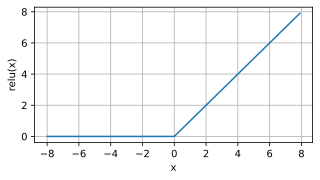

In [2]:
%matplotlib inline
import torch
import matplotlib as plt
from d2l import torch as d2l

# ReLU函数
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))



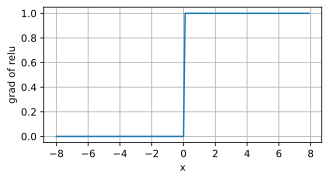

In [3]:
# ReLU函数求导
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

### 1.1.2 sigmoid函数
输入变换为区间(0, 1)上的输出，也称为挤压函数。

$sigmoid(x)=\frac{1}{1+exp(-x)}$

当我们想要将输出视作二元分类问题的概率时， sigmoid仍然被广泛用作输出单元上的激活函数 （sigmoid可以视为softmax的特例）

在隐藏层中较少使用，大部分用ReLU。

sigmoid函数的导数如下所示。 注意，当输入为0时，sigmoid函数的导数达到最大值0.25； 而输入在任一方向上越远离0点时，导数越接近0。

$\frac{d}{dx}sigmoid(x)=\frac{exp(-x)}{(1+exp(-x))^2}=sigmoid(x)(1-sigmoid(x))$

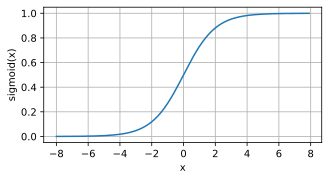

In [4]:
# sigmoid函数
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

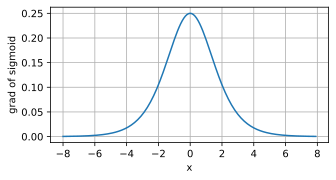

In [5]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### 1.1.3 tanh函数
tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上。

$tanh(x)=\frac{1-exp(-2x)}{1+exp(-2x)}$

当输入在0附近时，tanh函数接近线性变换。 函数的形状类似于sigmoid函数， 不同的是tanh函数关于坐标系原点中心对称

tanh函数的导数如下所示。 当输入接近0时，tanh函数的导数接近最大值1。 与我们在sigmoid函数图像中看到的类似， 输入在任一方向上越远离0点，导数越接近0。


$\frac{d}{dx}tanh(x)=1-tanh^2(x)$


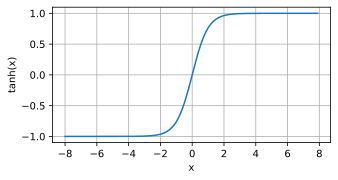

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

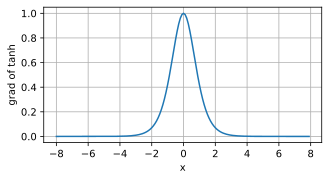

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 1.2 练习
1.计算prelu的导数

3.证明tanh(x)+1=2sigmoid(2x)

4.假设我们有一个非线性单元，将它一次应用于一个小批量的数据。你认为这会导致什么样的问题？

数据可能会被剧烈的拉伸或者压缩，可能会导致分布的偏移，并且与后面的神经元对接后可能会损失一定的特征。

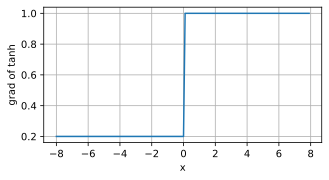

In [8]:
# 1.pReLU函数
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True,dtype=torch.float32)
weight=torch.tensor([0.2])
y=torch.prelu(x,weight)
#y = torch.prelu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))


In [9]:
# 3.
a=(torch.tanh(x)+1)
b=2*torch.sigmoid(2*x)-a
abs(b)<1e-5



tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

# 2 多层感知机从零开始实现
实现一个单隐藏层的多层感知机，则有两个输出。


In [10]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

100%|██████████| 26421880/26421880 [00:19<00:00, 1366599.59it/s]


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 105316.56it/s]


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:04<00:00, 990541.93it/s] 


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 4955767.04it/s]

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



## 2.1 初始化模型参数
784个输入特征 和10个类的简单分类数据集

隐藏层有256个隐藏单元

每层权重共享，所以有两套权重

In [11]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

## 2.2 激活函数
使用ReLU函数

In [12]:
# 自定义，也可以直接调用torch.relu()
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

## 2.3 模型
reshape将每个二维图像转换为一个长度为num_inputs的向量

In [13]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

## 2.4 损失函数

In [14]:
loss = nn.CrossEntropyLoss(reduction='none')

## 2.5 训练及测试
幸运的是，多层感知机的训练过程与softmax回归的训练过程完全相同。 可以直接调用d2l包的train_ch3函数， 将迭代周期数设置为10，并将学习率设置为0.1.

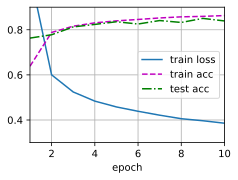

In [15]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

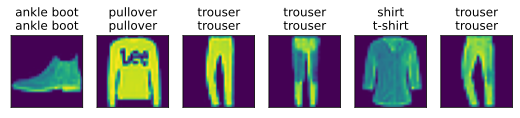

In [16]:
d2l.predict_ch3(net, test_iter)

## 2.6 练习
隐藏层单元数、隐藏层数、学习率、轮数对结果的影响
如何构建多个超参数的搜索方法
不同组合的超参数对结果的影响不同，可以采用网格式搜索，或者随机组合搜索

# 3 多层感知机的简洁实现
## 3.1 简洁代码实现

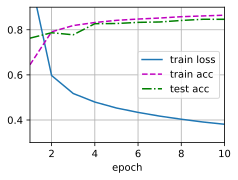

In [17]:
# 网络结构
net=nn.Sequential(nn.Flatten(),
                nn.Linear(784,256),
                nn.ReLU(),
                nn.Linear(256,10))

# 初始化模型参数
def initial_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)

net.apply(initial_weights)

# 设置超参数
batch_size,lr,num_epochs=256,0.1,10

# 损失函数
loss=nn.CrossEntropyLoss(reduction='none')

# 优化方法
trainer=torch.optim.SGD(net.parameters(),lr=lr)

# 训练集和测试集划分
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

# 训练
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)


## 3.2 练习
尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？

尝试不同的激活函数，哪个效果最好？

尝试不同的方案来初始化权重，什么方法效果最好？

# 4 模型选择、欠拟合和过拟合

**训练误差**是指， 模型在训练数据集上计算得到的误差。 **泛化误差**是指， 模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

前提假设：数据是独立同分布

有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近

有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。

通常对于神经网络，我们认为需要更多训练迭代的模型比较复杂， 而需要早停（early stopping）的模型（即较少训练迭代周期）就不那么复杂。

**几个倾向于影响模型泛化的因素**：

1. 可调整参数的数量。当可调整参数的数量（有时称为自由度）很大时，模型往往更容易过拟合。
2. 参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。
3. 训练样本的数量。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

## 4.1 模型选择
不同的模型或者同意模型下不同的超参数

训练集、测试集和验证集：验证集时用来评估模型好坏的数据，例如拿出50%的训练数据，不能和训练数据混在一起；

当训练数据较少时，可以采用K折交叉验证：原始训练数据被分成K个不重叠的子集。 然后执行K次模型训练和验证，每次在K-1个子集上进行训练， 并在剩余的一个子集（在该轮中没有于训练的子集）上进行验证。 最后，通过对K次实验的结果取平均来估计训练和验证误差。

## 4.2 欠拟合和过拟合

欠拟合：训练误差和验证误差都很严重， 但它们之间仅有一点差距。应该有另外一个更复杂的模型降低训练误差

过拟合：训练误差明显低于验证误差时

是否过拟合或欠拟合可能取决于**模型复杂性**和**可用训练数据集的大小**

模型复杂性：参数个数和参数范围值
![image.png](https://s2.loli.net/2023/03/24/u4avNkWjVnBQesX.png)

数据集大小：一般来说，数据量小会造成过拟合。随着数据量增加，泛化误差通常会减小。对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。 给出更多的数据，我们可能会尝试拟合一个更复杂的模型。 能够拟合更复杂的模型可能是有益的。 如果没有足够的数据，简单的模型可能更有用。

## 4.3 多项式回归
通过多项式回归实验来看一下过拟合和欠拟合

$y=5+1.2x-3.4\frac{x^2}{2!}+5.6\frac{x^3}{3!}+ε   其中 ε~N(0,0.1^2)$

In [18]:
## 生成数据集
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l


max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)
np.arange(max_degree).reshape(1, -1),poly_features.shape,labels.shape

(array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19]]),
 (200, 20),
 (200,))

In [19]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.1314],
         [ 0.0531]]),
 tensor([[ 1.0000e+00, -1.3136e-01,  8.6271e-03, -3.7774e-04,  1.2404e-05,
          -3.2588e-07,  7.1343e-09, -1.3387e-10,  2.1981e-12, -3.2082e-14,
           4.2141e-16, -5.0322e-18,  5.5084e-20, -5.5658e-22,  5.2221e-24,
          -4.5730e-26,  3.7543e-28, -2.9009e-30,  2.1169e-32, -1.4635e-34],
         [ 1.0000e+00,  5.3140e-02,  1.4120e-03,  2.5011e-05,  3.3227e-07,
           3.5314e-09,  3.1277e-11,  2.3744e-13,  1.5772e-15,  9.3125e-18,
           4.9487e-20,  2.3907e-22,  1.0587e-24,  4.3276e-27,  1.6427e-29,
           5.8194e-32,  1.9328e-34,  6.0418e-37,  1.7837e-39,  4.9886e-42]]),
 tensor([4.8420, 5.1742]))

In [20]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [21]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### 三阶多项式函数拟合正常

weight: [[ 5.0288563  1.3634336 -3.4511487  5.1216807]]


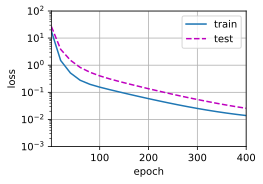

In [22]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 欠拟合


weight: [[3.3476489 3.3556752]]


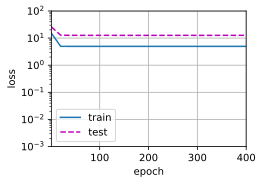

In [23]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 过拟合

weight: [[ 4.9867477   1.2660384  -3.2573824   5.2402806  -0.4914029   1.1591575
  -0.14921321  0.01057948  0.02779724 -0.02531682 -0.18161389  0.07318418
  -0.02691292 -0.13439313  0.04633156  0.09541824 -0.04018396 -0.16863096
   0.19255653  0.20409167]]


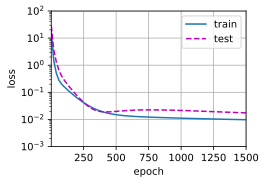

In [24]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

# 5 权重衰减--处理过拟合
权重衰减（weight decay）是最广泛使用的正则化的技术之一， 它通常也被称为L2正则化。

线性回归中损失为$L(w,b)$

为了惩罚权重向量的大小，添加$||w||^2$,引入正则化常数λ：

损失函数变为$L(w,b)+\frac{λ}{2}||w||^2$。当λ为0时，和原来一样，对于λ>0，限制了$||w||$的大小。

 
L2正则化线性模型构成经典的岭回归算法， L1正则化线性回归是统计学中类似的基本模型通常被称为套索回归。使用L2范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。 这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。 在实践中，这可能使它们对单个变量中的观测误差更为稳定。 相比之下，L1惩罚会导致模型将权重集中在一小部分特征上， 而将其他权重清除为零。 这称为特征选择（feature selection），这可能是其他场景下需要的。

## 5.1 高维线性回归
维度d=200，20个样本的小训练集

In [25]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

# 生成数据集
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

## 5.2 从零开始实现
### 5.2.1 初始化模型参数

In [26]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

### 5.2.2 定义L2惩罚

In [27]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

### 5.2.3 训练

In [28]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

### 5.2.4 忽略正则化实现


w的L2范数是： 13.917839050292969


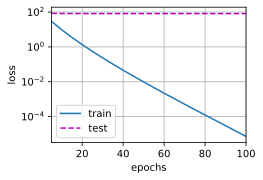

In [29]:
train(lambd=0)

### 5.2.5 使用权重衰减

w的L2范数是： 0.39383426308631897


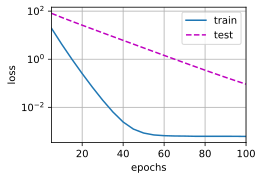

In [30]:
train(lambd=3)

## 5.3 简洁实现

In [31]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.01
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 14.35512924194336


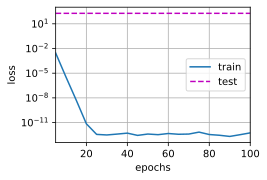

In [32]:
train_concise(0)

w的L2范数： 0.07474003732204437


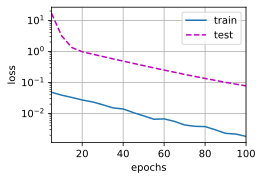

In [33]:
train_concise(5)

# 6 丢弃法、暂退法
思想：在训练过程中，他们建议在计算后续层之前向神经网络的每一层增加噪声，从而在输入与输出映射上增加平滑性。

一种注入噪声的方法：

在标准暂退法正则化中，通过保留（未丢弃）的节点的分数进行规范化来消除每一层的偏差。或者说每个中间活性值h以暂退概率p由随机变量h'替换

$概率为p，h'=0 ；其他，h'=\frac{h}{1-p}$

1. 正则项只在训练中使用；在推理过程中，丢弃法直接返回输入
2. 丢弃法在一些输出项随机设置为0来控制模型复杂度
3. 常作用在多层感知机的隐藏输出上
4. 丢弃概率是控制模型复杂度的超参数
5. 用在全连接层

## 6.1 从零开始实现

示例是实现单层的暂退法函数，从均匀分布【0，1】中抽取样本，样本数与神经网络的维度一致，保留概率大于p的神经元

注意：丢弃输入元素后，重新缩放剩余部分：将剩余部分除以1-p

### 6.1.1 定义丢弃函数

In [34]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [35]:
## p=0,0.5,1
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  0.,  0.,  8.,  0., 12.,  0.],
        [ 0.,  0., 20., 22.,  0., 26., 28.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


### 6.1.2 定义模型参数


In [36]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

### 6.1.3 定义模型

In [37]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

### 6.1.4 训练和测试

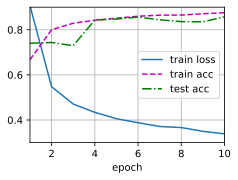

In [38]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 6.2 简洁实现

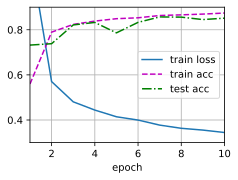

In [39]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 6.3 练习
1. 如果更改第一层和第二层的暂退法概率，会发生什么情况？具体地说，如果交换这两个层，会发生什么情况？设计一个实验来回答这些问题，定量描述该结果，并总结定性的结论。

A:其实差别不大，第一层暂退法概率大点，第二层暂退法概率小点效果会略微优一点。前面层抽取的是比较底层的语义信息，有较多的无用信息冗余通过强神经元，从而使得网络记住这些冗余信息而学不到关键信息(导致过拟合)，用较大Dropout较好，后面层主管高层抽象语义信息，较为关键，是把握识别整体的关键部分，用较小Dropout较好

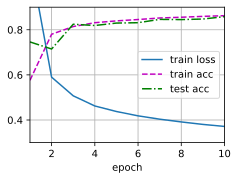

In [40]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(0.5),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(0.2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

2. 增加训练轮数，并将使用暂退法和不使用暂退法时获得的结果进行比较。

没有droupout的训练效果会更好，但是泛化效果不好

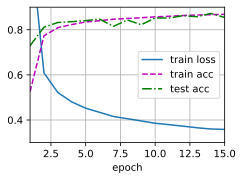

In [50]:
num_epochs=15
dropout1,dropout2=0.5,0.2

net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

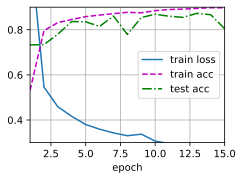

In [57]:
num_epochs=15
dropout1,dropout2=0,0

net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

3. 当应用或不应用暂退法时，每个隐藏层中激活值的方差是多少？绘制一个曲线图，以显示这两个模型的每个隐藏层中激活值的方差是如何随时间变化的。
4. 为什么在测试时通常不使用暂退法？
测试时不需要更新模型
5. 以本节中的模型为例，比较使用暂退法和权重衰减的效果。如果同时使用暂退法和权重衰减，会发生什么情况？结果是累加的吗？收益是否减少（或者说更糟）？它们互相抵消了吗？
把学习率调为0.2之后，运行四种情况发现两种方法的效果并不是累加的。

AssertionError: 0.5577793348948161

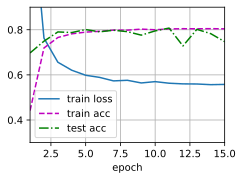

In [60]:
# 同时使用暂退法和权重衰减
num_epochs=15
dropout1,dropout2=0.5,0.2
wd=0.01
lr=0.2
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr,weight_decay=wd)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AssertionError: 0.5220791908899943

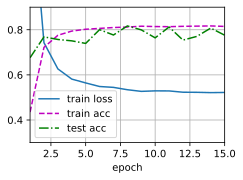

In [61]:
# 使用权重衰减
num_epochs=15
dropout1,dropout2=0,0
wd=0.01
lr=0.2
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr,weight_decay=wd)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

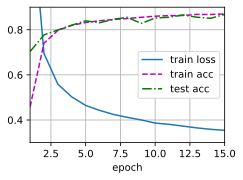

In [62]:
# 使用暂退法
num_epochs=15
dropout1,dropout2=0.5,0.2

lr=0.2
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

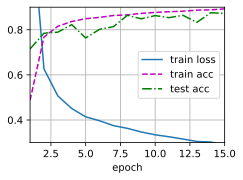

In [63]:
# 啥都不用
num_epochs=15
dropout1,dropout2=0,0

lr=0.2
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

6. 如果我们将暂退法应用到权重矩阵的各个权重，而不是激活值，会发生什么？
效果稍比应用到激活值好一些，但差别不大

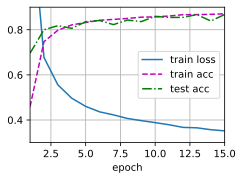

In [64]:
# 使用暂退法
num_epochs=15
dropout1,dropout2=0.5,0.2

lr=0.2
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.Dropout(dropout1),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.Dropout(dropout2),
        nn.ReLU(),      
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 7 前向传播、反向传播和计算图
将重点放在带权重衰减（L2正则化）的单隐藏层多层感知机上。

前向传播 指的是：按顺序（从输入层到输出层）计算和存储神经网络中每层的结果。

反向传播指的是计算神经网络参数梯度的方法。来源于微积分中的链式法则。

训练神经网络时，二者是相互依赖的。前向传播，沿着依赖的方向遍历计算图并计算路径上的所有变量。然后将这些用于反向传播，顺序与计算图相反。

前向传播计算正则项取决于模型参数，它们是由优化算法根据最新迭代的反向传播得到的。

反向传播重复利用前向传播中存储的中间值，所以需要保留中间值。比单纯预测需要更多的内存。

# 8 数值稳定性和模型初始化
梯度是很多个矩阵与梯度向量的乘积，容易受到数值下溢问题的影响。当太多的概率乘在一起时，一个常用技巧是切换到对数空间。但最初的矩阵可能有各种各样的特征值。乘积可能很大或者很小。

这会带来优化算法的不稳定问题：梯度爆炸，参数更新过大，破坏模型的稳定收敛；梯度消失，参数更新过小，每次更新时几乎不会移动，导致模型无法学习。

## 8.1 梯度消失和梯度爆炸
### 8.1.1 梯度消失

sigmoid函数是导致梯度消失的一个常见原因。当输入很大或者很小时，梯度会消失。

ReLU激活函数缓解了梯度消失问题，这样可以加速收敛。

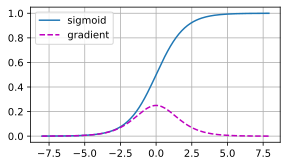

In [65]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

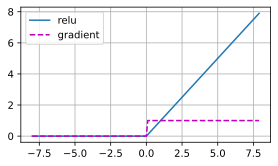

In [67]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['relu', 'gradient'], figsize=(4.5, 2.5))

### 8.1.2 梯度爆炸
比如深度网络的初始化导致，没有机会让梯度下降优化器收敛

对16位浮点数尤为严重

In [66]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[ 0.4849, -1.2535,  0.3798, -0.0308],
        [-0.4136, -1.0532,  0.5760,  0.2090],
        [ 0.6471, -0.0435, -0.5779,  0.8071],
        [ 0.0532,  1.2029,  0.0535,  0.5949]])
乘以100个矩阵后
 tensor([[-1.3159e+25, -1.1549e+25, -9.5773e+24, -1.4289e+25],
        [-7.8790e+24, -6.9152e+24, -5.7345e+24, -8.5557e+24],
        [-6.0523e+23, -5.3119e+23, -4.4050e+23, -6.5721e+23],
        [ 6.0241e+24,  5.2872e+24,  4.3845e+24,  6.5416e+24]])


### 8.1.3 打破对称性
在每一层的隐藏单元之间具有排列对称性。

如果隐藏层的所有参数初始化为相同值，在基于梯度的迭代之后，参数依然相同，这样的迭代永远不会打破对称性。虽然小批量随机梯度下降不会打破这种对称性，但暂退法正则化可以。

## 8.2 解决方法

目标：梯度值在合理范围内，如[1e-6,1e3]

1. 将乘法变加法：ResNet,LSTM

2. 归一化：梯度归一化，梯度裁剪

3. 合理的权重初始和激活函数

## 8.3 参数初始化

参数初始化可以解决或者减轻上述问题。

需要用启发式的初始化方法来确保初始梯度既不太大也不太小。

**希望**：让每层的方差是一个常数。将每层的输出和梯度都看作随机变量，让他们的均值和方差都保持一致。

正向：$E[h_i^t]=0, Var[h_i^t]=a$

反向：$E[\frac{\partial l}{\partial h_i^t}]=0, Var[\frac{\partial l}{\partial h_i^t}]=b$


### 8.3.1 默认初始化

框架默认的是随机初始化方法，对于中等难度的问题，这种方法是有效的

训练开始时更容易有数值不稳定，远离最优解的地方损失函数表面可能很复杂，最优解附近表面会比较平。

之前的示例中采用正态分布来初始化权重，对于小网络来说没有问题。

### 8.3.3 Xavier初始化
对于每一层，输出的方差不受输入数量的影响，任何梯度的方差不受输出数量的影响。

权重之间独立同分布，输入与权重之间独立

**正向期望与方差**

$E[h_i^t]=E[\sum\limits_jw_{i,j}^th_j^{t-1}]=\sum\limits_jE[w_{i,j}^t]E[th_j^{t-1}]=0$


$Var[h_i^t]=E[(h_i^t)^2]E[h_i^t]^2=n_{t-1}γ_tVar[h_j^{t-1}]$   $ n_{t-1}γ_t=1$

**反向期望与方差**

$E[\frac{\partial l}{\partial h_i^t}]=0$

$Var[\frac{\partial l}{\partial h_i^{t-1}}]=n_tγ_tVar\frac{\partial l}{\partial h_i^t}]$  
 
$n_tγ_t=1$

但是：

1. 由于$n_{t-1}$和$n_t$是网络结构参数，难以满足$n_{t-1}γ_t=1$和$n_tγ_t=1$

2. Xavier使得 $(n_t+n_{t-1})γ_t/2=1$ → $γ_t=(n_t+n_{t-1})/2$
正态分布：$N(0,\sqrt{2/(n_t+n_{t-1})})$

均匀分布：$U(-\sqrt{6/(n_t+n_{t-1})},\sqrt{6/(n_t+n_{t-1})})$:分布U[-a,a]和方差是$a^2/3$

3. 适配权重形状变换，特别是$n_t$

## 8.4 假设线性的激活函数
$σ(x)=αx+β$

**正向**：

$E[h_i^t]=E[αh'_i+β]=β$  β=0

$Var[h_i^t]=α^2Var[h'_i]$  α=1

反向与前面相同：β=0，α=1

**以上结果说明激活函数f(x)=x**

将常用函数使用泰勒展开(也可以画图查看)

$sigmoid(x)=\frac{1}{2}+\frac{x}{4}-\frac{x^3}{48}+O(x^5)$

$tanh(x)=0+x-\frac{x^3}{3}+O(x^5)$

$relu(x)=0+x for x>=0$

在原点附近，tanh和relu基本可以满足条件，对于sigmoid函数可以进行一些调整，比如：4sigmoid(x)-2


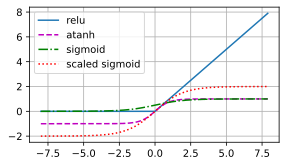

In [71]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
y1=torch.tanh(x)
y2=torch.sigmoid(x)
y3=4*y2-2

d2l.plot(x.detach().numpy(), [y.detach().numpy(),y1.detach().numpy(),
                            y2.detach().numpy(),y3.detach().numpy()],
         legend=['relu', 'atanh','sigmoid','scaled sigmoid'], figsize=(4.5, 2.5))

# 9 环境和分布偏移

## 9.1 分布偏移的类型

在许多情况下，训练集和测试集并不来自同一个分布。这就是所谓的分布偏移。

### 9.1.1 协变量偏移

理想情况下测试集与训练集应该有相同的数据分布。

协变量偏移指的是训练集和测试集中的输入变量具有不同的数据分布。协变量偏移意味着只有输入分布发生变化，而输入到输出的映射关系保持不变。 p(x)不同，条件概率p(y|x) 是不变的。

### 9.1.2 标签偏移

与协变量相反。p(y)不同，条件概率p(x|y) 是不变的。

例如，预测患者的疾病，我们可能根据症状来判断， 即使疾病的相对流行率随着时间的推移而变化。 标签偏移在这里是恰当的假设，因为疾病会引起症状。

### 9.1.3 概念偏移

当标签的定义发生变化时，就会出现这种问题。

## 9.2 分布偏移纠正

经验风险最小化

真实风险是从真实分布中抽取的所有数据的总体损失的预期。然而，这个数据总体通常是无法获得的。经验风险是训练数据的平均损失，用于近似真实风险。

在相应的假设条件下，可以在测试时检测并纠正协变量偏移和标签偏移。在测试时，不考虑这种偏移可能会成为问题。

## 9.3 学习问题的分类法

1. 批量学习
用一组数据训练f(X),然后用来自同一分布的新数据训练，之后就不再更新

2. 在线学习
观测到x,得出估计值f(x),然后观测到y.根据绝当，得到奖励或损失。在线学习过程中，给定新的观测结果，不断地改进模型

3. 老虎机
是在线学习的一个特例。在大多数学习问题中，我们有一个连续参数化的函数；但在一个老虎机问题中，可以采取的行动是有限的。对于这个更简单的问题，可以获得更强的最优性理论保证

4. 控制
它的反应取决于之前发生的事。PID

5. 强化学习
强调如何基于环境而行动，以取得最大化的预期利益

6. 考虑到环境
在静止环境中可能一直有效的相同策略， 在环境能够改变的情况下可能不会始终有效。

当试图解决的问题会随着时间的推移而发生变化是，考虑到环境是非常重要的。